Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzipping the EMDS7 zip File


In [ ]:
!unzip "/content/drive/MyDrive/Colab/FY_Project/EMDS7.zip" -d "/content/drive/MyDrive/Colab/FY_Project"

unzip:  cannot find or open /content/drive/MyDrive/Colab/FY_Project/EMDS7.zip, /content/drive/MyDrive/Colab/FY_Project/EMDS7.zip.zip or /content/drive/MyDrive/Colab/FY_Project/EMDS7.zip.ZIP.


Converting the dataset according to EfficientNet Format

In [ ]:
import os
import shutil
import xml.etree.ElementTree as ET

# Define paths
ANNOTATIONS_PATH = "/content/drive/MyDrive/Colab/FY_Project/EMDS7xml"
IMAGES_PATH = "/content/drive/MyDrive/Colab/FY_Project/"
OUTPUT_PATH = "/content/drive/MyDrive/Colab/FY_Project/EMDS7_dataset_classified"

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Iterate through XML files and move images
for xml_file in os.listdir(ANNOTATIONS_PATH):
    if not xml_file.endswith(".xml"):
        continue

    # Parse XML file
    tree = ET.parse(os.path.join(ANNOTATIONS_PATH, xml_file))
    root = tree.getroot()

    # Extract class name
    class_name = root.find("object/name").text

    # Create class folder
    class_folder = os.path.join(OUTPUT_PATH, class_name)
    os.makedirs(class_folder, exist_ok=True)

    # Move image to the class folder
    img_file = xml_file.replace(".xml", ".png")  # Assuming images are in PNG format
    img_path = os.path.join(IMAGES_PATH, img_file)

    if os.path.exists(img_path):
        shutil.move(img_path, os.path.join(class_folder, img_file))

print("✅ XML labels converted to folder-based format for EfficientNet!")

✅ XML labels converted to folder-based format for EfficientNet!


Class Mapping

In [ ]:
import os
import shutil
import re

# Directory paths
images_path = "/content/drive/MyDrive/Colab/FY_Project/EMDS7_dataset_classified"
output_path = "/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet"

os.makedirs(output_path, exist_ok=True)

# Class names
names_list = ['Oscillatoria', 'Ankistrodesmus', 'Microcystis', 'Gomphonema', 'Sphaerocystis',
              'Cosmarium', 'Cocconeis', 'Tribonema', 'Chlorella', 'Tetraedron', 'Ankistrodesmus',
              'Brachionus', 'Chaenea', 'Pediastrum', 'Spirulina', 'Actinastrum', 'Navicula',
              'Scenedesmus', 'Golenkinia', 'Pinnularia', 'Staurastrum', 'Phormidium', 'Fragilaria',
              'Anabaenopsis', 'Coelosphaerium', 'Crucigenia', 'Achnanthes', 'Synedra', 'Ceratium',
              'Pompholyx', 'Merismopedia', 'Spirogyra', 'Coelastrum', 'Raphidiopsis', 'Gomphosphaeria',
              'Euglena', 'Euclanis', 'Keratella', 'diversicornis', 'Surirella', 'Characium']

# Generate class mapping (GXXX to class name)
class_mapping = {f"G{i+1:03}": name for i, name in enumerate(names_list)}

# Iterate through subfolders in images_path
for subfolder in os.listdir(images_path):
    if subfolder in class_mapping:  # Check if subfolder is a valid class code (GXXX)
        class_name = class_mapping[subfolder]  # Get class name from mapping
        class_folder = os.path.join(output_path, class_name)  # Destination folder
        os.makedirs(class_folder, exist_ok=True)  # Create if it doesn't exist

        # Iterate through images in the subfolder
        for image_file in os.listdir(os.path.join(images_path, subfolder)):
            # Check if the image filename contains the current class code (GXXX)
            if subfolder in image_file:
                source_image_path = os.path.join(images_path, subfolder, image_file)
                destination_image_path = os.path.join(class_folder, image_file)

                try:
                    shutil.copy(source_image_path, destination_image_path)
                    print(f"Copied {image_file} to {class_folder}")
                except Exception as e:
                    print(f"Error copying {image_file}: {e}")

print("✅ Images organized for EfficientNet!")

Copied EMDS7-G001-038-0400.png to /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/Oscillatoria
Copied EMDS7-G001-028-0400.png to /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/Oscillatoria
Copied EMDS7-G001-004-0400.png to /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/Oscillatoria
Copied EMDS7-G001-014-0400.png to /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/Oscillatoria
Copied EMDS7-G001-013-0400.png to /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/Oscillatoria
Copied EMDS7-G001-031-0400.png to /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/Oscillatoria
Copied EMDS7-G001-039-0400.png to /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/Oscillatoria
Copied EMDS7-G001-005-0400.png to /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/Oscillatoria
Copied EMDS7-G001-032-0400.png to /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/Oscillatoria
Copied EMDS7-G001-027-0400.png to /content/dri

Mapping as Harmful and Non Harmful

In [ ]:
import pandas as pd

# Load the class mapping from the CSV file
class_mapping_df = pd.read_csv('/content/drive/MyDrive/Colab/FY_Project/class_mapping.csv')

# Replace 0 and 1 with "Not Harmful" and "Harmful"
class_mapping_df['Harmful'] = class_mapping_df['Harmful'].replace({0: 'Not Harmful', 1: 'Harmful'})

# Replace missing values with "Missing"
class_mapping_df['Harmful'] = class_mapping_df['Harmful'].fillna('Missing')

# Display the DataFrame in a table format
from IPython.display import display, HTML  # Import necessary modules
display(HTML(class_mapping_df[['Class Name', 'Harmful']].to_html(index=False)))  # Display as HTML table

Class Name,Harmful
Oscillatoria,Harmful
Ankistrodesmus,Not Harmful
Microcystis,Harmful
Gomphonema,Not Harmful
Sphaerocystis,Not Harmful
Cosmarium,Not Harmful
Cocconeis,Not Harmful
Tribonema,Not Harmful
Chlorella,Not Harmful
Tetraedron,Not Harmful


Classifying as Harmful and Not Harmful


In [ ]:
import os
import shutil
import pandas as pd

# Define paths
emds7_path = "/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet"
harmful_path = os.path.join(emds7_path, "harmful")
non_harmful_path = os.path.join(emds7_path, "non_harmful")

# Create harmful and non_harmful folders if they don't exist
os.makedirs(harmful_path, exist_ok=True)
os.makedirs(non_harmful_path, exist_ok=True)

# Load the class mapping from the CSV file
class_mapping_df = pd.read_csv('/content/drive/MyDrive/Colab/FY_Project/class_mapping.csv')

# Iterate through subfolders in non_harmful folder
for folder_name in os.listdir(non_harmful_path):
    if os.path.isdir(os.path.join(non_harmful_path, folder_name)):
        try:
            # Get harmful status from class mapping using 'Class Name'
            harmful_status = class_mapping_df.loc[class_mapping_df['Class Name'] == folder_name, 'Harmful'].iloc[0]
        except IndexError:
            print(f"Warning: '{folder_name}' not found in class mapping CSV. Skipping.")
            continue  # Skip to the next folder

        # Move folder to harmful if harmful_status is 1
        if harmful_status == 1:
            source_path = os.path.join(non_harmful_path, folder_name)
            destination_path = os.path.join(harmful_path, folder_name)
            shutil.move(source_path, destination_path)
            print(f"Moved '{folder_name}' to '{destination_path}'")

print("✅ Folders reorganized based on harmful status!")

Moved 'Oscillatoria' to '/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/harmful/Oscillatoria'
Moved 'Microcystis' to '/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/harmful/Microcystis'
Moved 'Phormidium' to '/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/harmful/Phormidium'
Moved 'Pediastrum' to '/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/harmful/Pediastrum'
Moved 'Staurastrum' to '/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/harmful/Staurastrum'
Moved 'Fragilaria' to '/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/harmful/Fragilaria'
Moved 'Anabaenopsis' to '/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/harmful/Anabaenopsis'
Moved 'Coelosphaerium' to '/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/harmful/Coelosphaerium'
Moved 'Merismopedia' to '/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/harmful/Merismopedia'
Moved 'Raphidiopsis' to '/content/drive/MyDrive/Colab/FY_P

Data Exploration

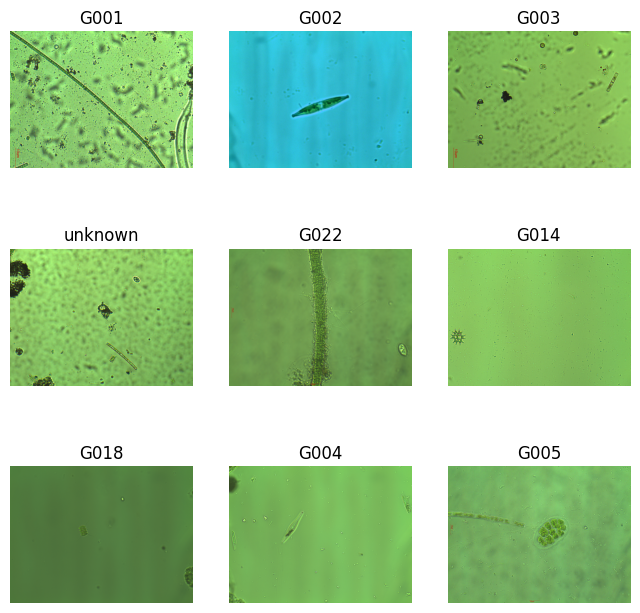

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Define image path (Updated to use EMDS7_dataset_Classified)
image_dir = "/content/drive/MyDrive/Colab/FY_Project/EMDS7_dataset_classified"

# Get a list of random images
sample_classes = os.listdir(image_dir)
sample_images = []

# Collect one sample per class
for class_name in sample_classes[:9]:  # Display first 9 classes
    class_images = os.listdir(os.path.join(image_dir, class_name))
    if class_images:
        random_image = random.choice(class_images)  # Select random image
        sample_images.append((class_name, os.path.join(image_dir, class_name, random_image)))

# Plot images in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, (class_name, img_path) in enumerate(sample_images):
    img = Image.open(img_path)
    axes[i // 3, i % 3].imshow(img)
    axes[i // 3, i % 3].set_title(class_name)
    axes[i // 3, i % 3].axis("off")
plt.show()

Resize the image

In [ ]:
from PIL import Image
import os

def resize_images(folder_path, target_size):
    print(f"Processing folder: {folder_path}")
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        # Check if file is an image and not hidden, case-insensitive
        if os.path.isfile(image_path) and not filename.startswith('.') and filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                with Image.open(image_path) as img:
                    img = img.resize(target_size, Image.Resampling.LANCZOS)  # Use Image.Resampling.LANCZOS instead of Image.ANTIALIAS
                    print(f"Resized: {image_path}")  # Print before saving
                    img.save(image_path)
            except Exception as e:
                print(f"Error resizing {image_path}: {e}")
        else:
            print(f"Skipping: {image_path} (not a valid image file)") # Print for skipped files


image_dir = "/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet"  # Verify path!
target_size = (224, 224)

# Exclude hidden folders when iterating
for subfolder in os.listdir(image_dir):
    if not subfolder.startswith('.'):  # Exclude hidden folders
        subfolder_path = os.path.join(image_dir, subfolder)
        if os.path.isdir(subfolder_path):
            # Iterate through sub-subfolders (where images are located)
            for subsubfolder in os.listdir(subfolder_path):
                subsubfolder_path = os.path.join(subfolder_path, subsubfolder)
                if os.path.isdir(subsubfolder_path):
                    resize_images(subsubfolder_path, target_size)

print("✅ All images resized!")

Processing folder: /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/non_harmful/Ankistrodesmus
Resized: /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/non_harmful/Ankistrodesmus/EMDS7-G002-001-0400.png
Resized: /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/non_harmful/Ankistrodesmus/EMDS7-G002-003-0400.png
Resized: /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/non_harmful/Ankistrodesmus/EMDS7-G002-004-0400.png
Resized: /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/non_harmful/Ankistrodesmus/EMDS7-G002-002-0400.png
Resized: /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/non_harmful/Ankistrodesmus/EMDS7-G002-005-0400.png
Resized: /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/non_harmful/Ankistrodesmus/EMDS7-G011-044-0400.png
Resized: /content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet/non_harmful/Ankistrodesmus/EMDS7-G011-004-0400.png
Resized: /content/drive/MyDrive/Colab/FY_Project/EMDS7_Efficie

Splitting into train and val

In [ ]:
!pip install split-folders[full]

import splitfolders
import os

# Define the input and output folder paths
input_folder = "/content/drive/MyDrive/Colab/FY_Project/EMDS7_EfficientNet"
output_folder = "/content/drive/MyDrive/Colab/FY_Project/data_split"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to split a specific subfolder
def split_subfolder(subfolder_name):
    subfolder_input_path = os.path.join(input_folder, subfolder_name)
    subfolder_output_path = os.path.join(output_folder, subfolder_name)

    # Split the subfolder into train and validation sets
    splitfolders.ratio(subfolder_input_path, output=subfolder_output_path, seed=42, ratio=(0.8, 0.2))
    print(f"✅ {subfolder_name} split into Train & Validation sets!")

# Split the 'harmful' and 'non_harmful' folders
for subfolder_name in ["harmful", "non_harmful"]:
    split_subfolder(subfolder_name)

print("✅ Dataset split complete!")


Copying files: 0 files [00:00, ? files/s]
Copying files: 9 files [00:00, 86.11 files/s]
Copying files: 18 files [00:00, 69.81 files/s]
Copying files: 26 files [00:00, 64.27 files/s]
Copying files: 33 files [00:00, 66.05 files/s]
Copying files: 41 files [00:00, 69.11 files/s]
Copying files: 49 files [00:01, 27.32 files/s]
Copying files: 57 files [00:01, 34.37 files/s]
Copying files: 65 files [00:01, 41.32 files/s]
Copying files: 73 files [00:01, 48.00 files/s]
Copying files: 81 files [00:01, 54.15 files/s]
Copying files: 90 files [00:01, 60.21 files/s]
Copying files: 99 files [00:01, 64.59 files/s]
Copying files: 108 files [00:01, 70.88 files/s]
Copying files: 116 files [00:02, 72.67 files/s]
Copying files: 124 files [00:02, 73.56 files/s]
Copying files: 132 files [00:02, 74.82 files/s]
Copying files: 140 files [00:02, 75.93 files/s]
Copying files: 148 files [00:02, 76.64 files/s]
Copying files: 156 files [00:02, 76.65 files/s]
Copying files: 164 files [00:02, 76.12 files/s]
Copying fi

✅ harmful split into Train & Validation sets!



Copying files: 0 files [00:00, ? files/s]
Copying files: 6 files [00:00, 59.06 files/s]
Copying files: 13 files [00:00, 61.48 files/s]
Copying files: 22 files [00:00, 67.03 files/s]
Copying files: 29 files [00:00, 64.97 files/s]
Copying files: 36 files [00:00, 66.16 files/s]
Copying files: 43 files [00:00, 67.35 files/s]
Copying files: 52 files [00:00, 70.92 files/s]
Copying files: 61 files [00:00, 71.25 files/s]
Copying files: 69 files [00:01, 71.39 files/s]
Copying files: 77 files [00:01, 72.57 files/s]
Copying files: 85 files [00:01, 72.45 files/s]
Copying files: 93 files [00:01, 71.77 files/s]
Copying files: 102 files [00:01, 72.47 files/s]
Copying files: 111 files [00:01, 72.53 files/s]
Copying files: 121 files [00:01, 77.60 files/s]
Copying files: 129 files [00:01, 75.96 files/s]
Copying files: 137 files [00:01, 73.74 files/s]
Copying files: 145 files [00:02, 72.04 files/s]
Copying files: 153 files [00:02, 68.65 files/s]
Copying files: 161 files [00:02, 69.28 files/s]
Copying fi

✅ non_harmful split into Train & Validation sets!
✅ Dataset split complete!


Data preprocessing

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, ConcatDataset
import os
import shutil

# Image preprocessing transformations (without resizing and augmentation)
transform = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# Define data directories
data_dir = "/content/drive/MyDrive/Colab/FY_Project/data_split"
harmful_train_dir = os.path.join(data_dir, "harmful", "train")
harmful_val_dir = os.path.join(data_dir, "harmful", "val")
non_harmful_train_dir = os.path.join(data_dir, "non_harmful", "train")
non_harmful_val_dir = os.path.join(data_dir, "non_harmful", "val")

# Remove .ipynb_checkpoints if present
def remove_checkpoints(directory):
    checkpoint_dir = os.path.join(directory, ".ipynb_checkpoints")
    if os.path.exists(checkpoint_dir):
        shutil.rmtree(checkpoint_dir)
        print(f"Removed .ipynb_checkpoints from {directory}")

remove_checkpoints(harmful_train_dir)
remove_checkpoints(harmful_val_dir)
remove_checkpoints(non_harmful_train_dir)
remove_checkpoints(non_harmful_val_dir)

# Load datasets for each category and split
harmful_train_dataset = datasets.ImageFolder(root=harmful_train_dir, transform=transform['train'])
harmful_val_dataset = datasets.ImageFolder(root=harmful_val_dir, transform=transform['val'])
non_harmful_train_dataset = datasets.ImageFolder(root=non_harmful_train_dir, transform=transform['train'])
non_harmful_val_dataset = datasets.ImageFolder(root=non_harmful_val_dir, transform=transform['val'])

# Combine datasets
train_dataset = ConcatDataset([harmful_train_dataset, non_harmful_train_dataset])
val_dataset = ConcatDataset([harmful_val_dataset, non_harmful_val_dataset])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

print(f"✅ Data preprocessing completed! Classes: {train_dataset.datasets[0].classes + train_dataset.datasets[1].classes}")

Removed .ipynb_checkpoints from /content/drive/MyDrive/Colab/FY_Project/data_split/harmful/val
✅ Data preprocessing completed! Classes: ['Anabaenopsis', 'Coelosphaerium', 'Euglena', 'Fragilaria', 'Gomphosphaeria', 'Merismopedia', 'Microcystis', 'Oscillatoria', 'Pediastrum', 'Phormidium', 'Raphidiopsis', 'Staurastrum', 'Achnanthes', 'Actinastrum', 'Ankistrodesmus', 'Brachionus', 'Ceratium', 'Chaenea', 'Characium', 'Chlorella', 'Cocconeis', 'Coelastrum', 'Cosmarium', 'Crucigenia', 'Euclanis', 'Golenkinia', 'Gomphonema', 'Keratella', 'Navicula', 'Pinnularia', 'Pompholyx', 'Scenedesmus', 'Sphaerocystis', 'Spirogyra', 'Spirulina', 'Surirella', 'Synedra', 'Tetraedron', 'Tribonema', 'diversicornis']


Load EfficientNet Model

In [ ]:
!pip install efficientnet_pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from efficientnet_pytorch import EfficientNet

# Check if GPU is available and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")  # Print GPU name
else:
    device = torch.device("cpu")
    print("Using CPU")

# Load pre-trained EfficientNet
# Get the total number of classes from the individual datasets within ConcatDataset
num_classes = len(train_dataset.datasets[0].classes) + len(train_dataset.datasets[1].classes)
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

print("✅ EfficientNet model loaded!")

Using GPU: Tesla T4


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth

  0%|          | 0.00/20.4M [00:00<?, ?B/s]
100%|██████████| 20.4M/20.4M [00:00<00:00, 113MB/s] 


Loaded pretrained weights for efficientnet-b0
✅ EfficientNet model loaded!


Training the model

Training for 10 epochs

In [ ]:
!pip install efficientnet_pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from efficientnet_pytorch import EfficientNet
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, ConcatDataset
import os
import shutil

# Check if GPU is available and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

# Load pre-trained EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=2)  # Assuming 2 classes: harmful and non-harmful
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Image preprocessing transformations (without resizing)
transform = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# Define data directories
data_dir = "/content/drive/MyDrive/Colab/FY_Project/data_split"
harmful_train_dir = os.path.join(data_dir, "harmful", "train")
harmful_val_dir = os.path.join(data_dir, "harmful", "val")
non_harmful_train_dir = os.path.join(data_dir, "non_harmful", "train")
non_harmful_val_dir = os.path.join(data_dir, "non_harmful", "val")

# Remove .ipynb_checkpoints if present
def remove_checkpoints(directory):
    checkpoint_dir = os.path.join(directory, ".ipynb_checkpoints")
    if os.path.exists(checkpoint_dir):
        shutil.rmtree(checkpoint_dir)
        print(f"Removed .ipynb_checkpoints from {directory}")

remove_checkpoints(harmful_train_dir)
remove_checkpoints(harmful_val_dir)
remove_checkpoints(non_harmful_train_dir)
remove_checkpoints(non_harmful_val_dir)

# Load datasets for each category and split
harmful_train_dataset = datasets.ImageFolder(root=harmful_train_dir, transform=transform['train'])
harmful_val_dataset = datasets.ImageFolder(root=harmful_val_dir, transform=transform['val'])
non_harmful_train_dataset = datasets.ImageFolder(root=non_harmful_train_dir, transform=transform['train'])
non_harmful_val_dataset = datasets.ImageFolder(root=non_harmful_val_dir, transform=transform['val'])

# Combine datasets
train_dataset = ConcatDataset([harmful_train_dataset, non_harmful_train_dataset])
val_dataset = ConcatDataset([harmful_val_dataset, non_harmful_val_dataset])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            # Adjust labels for binary classification
            labels = torch.tensor([0 if label < len(harmful_train_dataset.classes) else 1 for label in labels], device=device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}: Loss = {running_loss/len(train_loader):.4f}, Train Acc = {train_accuracy:.2f}%")

        # Validation loop
        model.eval()
        val_correct, val_total = 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)

                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        print(f"Epoch {epoch+1}/{epochs}: Val Acc = {val_accuracy:.2f}%")

# Start training
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10)
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab/FY_Project/efficientnet_b0_harmful_non_harmful_best_loss_10.pth')

Using GPU: Tesla T4
Loaded pretrained weights for efficientnet-b0
Epoch 1/10: Loss = 0.5489, Train Acc = 71.46%
Epoch 1/10: Val Acc = 3.47%
Epoch 2/10: Loss = 0.3716, Train Acc = 84.57%
Epoch 2/10: Val Acc = 2.45%
Epoch 3/10: Loss = 0.2202, Train Acc = 91.29%
Epoch 3/10: Val Acc = 2.45%
Epoch 4/10: Loss = 0.1226, Train Acc = 95.87%
Epoch 4/10: Val Acc = 2.45%
Epoch 5/10: Loss = 0.1015, Train Acc = 96.97%
Epoch 5/10: Val Acc = 2.45%
Epoch 6/10: Loss = 0.0847, Train Acc = 97.19%
Epoch 6/10: Val Acc = 2.24%
Epoch 7/10: Loss = 0.0539, Train Acc = 98.02%
Epoch 7/10: Val Acc = 2.45%
Epoch 8/10: Loss = 0.0516, Train Acc = 98.62%
Epoch 8/10: Val Acc = 2.65%
Epoch 9/10: Loss = 0.0361, Train Acc = 98.84%
Epoch 9/10: Val Acc = 2.65%
Epoch 10/10: Loss = 0.0367, Train Acc = 98.90%
Epoch 10/10: Val Acc = 2.65%


Training for 15 epochs

In [ ]:
!pip install efficientnet_pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from efficientnet_pytorch import EfficientNet
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, ConcatDataset
import os
import shutil

# Check if GPU is available and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

# Load pre-trained EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=2)  # Assuming 2 classes: harmful and non-harmful
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Image preprocessing transformations (without resizing)
transform = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# Define data directories
data_dir = "/content/drive/MyDrive/Colab/FY_Project/data_split"
harmful_train_dir = os.path.join(data_dir, "harmful", "train")
harmful_val_dir = os.path.join(data_dir, "harmful", "val")
non_harmful_train_dir = os.path.join(data_dir, "non_harmful", "train")
non_harmful_val_dir = os.path.join(data_dir, "non_harmful", "val")

# Remove .ipynb_checkpoints if present
def remove_checkpoints(directory):
    checkpoint_dir = os.path.join(directory, ".ipynb_checkpoints")
    if os.path.exists(checkpoint_dir):
        shutil.rmtree(checkpoint_dir)
        print(f"Removed .ipynb_checkpoints from {directory}")

remove_checkpoints(harmful_train_dir)
remove_checkpoints(harmful_val_dir)
remove_checkpoints(non_harmful_train_dir)
remove_checkpoints(non_harmful_val_dir)

# Load datasets for each category and split
harmful_train_dataset = datasets.ImageFolder(root=harmful_train_dir, transform=transform['train'])
harmful_val_dataset = datasets.ImageFolder(root=harmful_val_dir, transform=transform['val'])
non_harmful_train_dataset = datasets.ImageFolder(root=non_harmful_train_dir, transform=transform['train'])
non_harmful_val_dataset = datasets.ImageFolder(root=non_harmful_val_dir, transform=transform['val'])

# Combine datasets
train_dataset = ConcatDataset([harmful_train_dataset, non_harmful_train_dataset])
val_dataset = ConcatDataset([harmful_val_dataset, non_harmful_val_dataset])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            # Adjust labels for binary classification
            labels = torch.tensor([0 if label < len(harmful_train_dataset.classes) else 1 for label in labels], device=device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}: Loss = {running_loss/len(train_loader):.4f}, Train Acc = {train_accuracy:.2f}%")

        # Validation loop
        model.eval()
        val_correct, val_total = 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)

                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        print(f"Epoch {epoch+1}/{epochs}: Val Acc = {val_accuracy:.2f}%")

# Start training
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=15)
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab/FY_Project/efficientnet_b0_harmful_non_harmful_best_loss_15.pth')

Using GPU: Tesla T4
Loaded pretrained weights for efficientnet-b0
Epoch 1/15: Loss = 0.5428, Train Acc = 72.67%
Epoch 1/15: Val Acc = 2.86%
Epoch 2/15: Loss = 0.3343, Train Acc = 86.17%
Epoch 2/15: Val Acc = 2.45%
Epoch 3/15: Loss = 0.1851, Train Acc = 94.05%
Epoch 3/15: Val Acc = 2.45%
Epoch 4/15: Loss = 0.1128, Train Acc = 96.31%
Epoch 4/15: Val Acc = 2.04%
Epoch 5/15: Loss = 0.0800, Train Acc = 97.47%
Epoch 5/15: Val Acc = 2.45%
Epoch 6/15: Loss = 0.0629, Train Acc = 98.18%
Epoch 6/15: Val Acc = 2.04%
Epoch 7/15: Loss = 0.0431, Train Acc = 98.57%
Epoch 7/15: Val Acc = 2.24%
Epoch 8/15: Loss = 0.0533, Train Acc = 97.96%
Epoch 8/15: Val Acc = 2.45%
Epoch 9/15: Loss = 0.0580, Train Acc = 98.13%
Epoch 9/15: Val Acc = 2.45%
Epoch 10/15: Loss = 0.0315, Train Acc = 99.01%
Epoch 10/15: Val Acc = 2.04%
Epoch 11/15: Loss = 0.0234, Train Acc = 99.34%
Epoch 11/15: Val Acc = 2.04%
Epoch 12/15: Loss = 0.0341, Train Acc = 98.62%
Epoch 12/15: Val Acc = 2.04%
Epoch 13/15: Loss = 0.0230, Train Acc = 

Training for 25 epochs

In [ ]:
!pip install efficientnet_pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from efficientnet_pytorch import EfficientNet
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, ConcatDataset
import os
import shutil

# Check if GPU is available and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

# Load pre-trained EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=2)  # Assuming 2 classes: harmful and non-harmful
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Image preprocessing transformations (without resizing)
transform = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# Define data directories
data_dir = "/content/drive/MyDrive/Colab/FY_Project/data_split"
harmful_train_dir = os.path.join(data_dir, "harmful", "train")
harmful_val_dir = os.path.join(data_dir, "harmful", "val")
non_harmful_train_dir = os.path.join(data_dir, "non_harmful", "train")
non_harmful_val_dir = os.path.join(data_dir, "non_harmful", "val")

# Remove .ipynb_checkpoints if present
def remove_checkpoints(directory):
    checkpoint_dir = os.path.join(directory, ".ipynb_checkpoints")
    if os.path.exists(checkpoint_dir):
        shutil.rmtree(checkpoint_dir)
        print(f"Removed .ipynb_checkpoints from {directory}")

remove_checkpoints(harmful_train_dir)
remove_checkpoints(harmful_val_dir)
remove_checkpoints(non_harmful_train_dir)
remove_checkpoints(non_harmful_val_dir)

# Load datasets for each category and split
harmful_train_dataset = datasets.ImageFolder(root=harmful_train_dir, transform=transform['train'])
harmful_val_dataset = datasets.ImageFolder(root=harmful_val_dir, transform=transform['val'])
non_harmful_train_dataset = datasets.ImageFolder(root=non_harmful_train_dir, transform=transform['train'])
non_harmful_val_dataset = datasets.ImageFolder(root=non_harmful_val_dir, transform=transform['val'])

# Combine datasets
train_dataset = ConcatDataset([harmful_train_dataset, non_harmful_train_dataset])
val_dataset = ConcatDataset([harmful_val_dataset, non_harmful_val_dataset])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            # Adjust labels for binary classification
            labels = torch.tensor([0 if label < len(harmful_train_dataset.classes) else 1 for label in labels], device=device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}: Loss = {running_loss/len(train_loader):.4f}, Train Acc = {train_accuracy:.2f}%")

        # Validation loop
        model.eval()
        val_correct, val_total = 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)

                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        print(f"Epoch {epoch+1}/{epochs}: Val Acc = {val_accuracy:.2f}%")

# Start training
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=25)
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab/FY_Project/efficientnet_b0_harmful_non_harmful_best_loss_25.pth')

Using GPU: Tesla T4
Loaded pretrained weights for efficientnet-b0
Epoch 1/25: Loss = 0.5634, Train Acc = 71.35%
Epoch 1/25: Val Acc = 3.67%
Epoch 2/25: Loss = 0.3618, Train Acc = 84.35%
Epoch 2/25: Val Acc = 2.45%
Epoch 3/25: Loss = 0.2052, Train Acc = 92.67%
Epoch 3/25: Val Acc = 2.45%
Epoch 4/25: Loss = 0.1369, Train Acc = 95.48%
Epoch 4/25: Val Acc = 2.24%
Epoch 5/25: Loss = 0.0867, Train Acc = 97.69%
Epoch 5/25: Val Acc = 2.24%
Epoch 6/25: Loss = 0.0774, Train Acc = 97.63%
Epoch 6/25: Val Acc = 2.04%
Epoch 7/25: Loss = 0.0674, Train Acc = 98.07%
Epoch 7/25: Val Acc = 2.24%
Epoch 8/25: Loss = 0.0501, Train Acc = 98.29%
Epoch 8/25: Val Acc = 2.04%
Epoch 9/25: Loss = 0.0460, Train Acc = 98.18%
Epoch 9/25: Val Acc = 2.04%
Epoch 10/25: Loss = 0.0316, Train Acc = 99.17%
Epoch 10/25: Val Acc = 2.04%
Epoch 11/25: Loss = 0.0295, Train Acc = 99.06%
Epoch 11/25: Val Acc = 2.04%
Epoch 12/25: Loss = 0.0479, Train Acc = 98.13%
Epoch 12/25: Val Acc = 2.65%
Epoch 13/25: Loss = 0.0460, Train Acc = 

Model Evaluation

Using GPU: Tesla T4
Evaluating model for epoch 10
Loaded pretrained weights for efficientnet-b0


<ipython-input-10-13eb1eb73ad6>:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'/content/drive/MyDrive/Colab/FY_Project/efficientnet_b0_

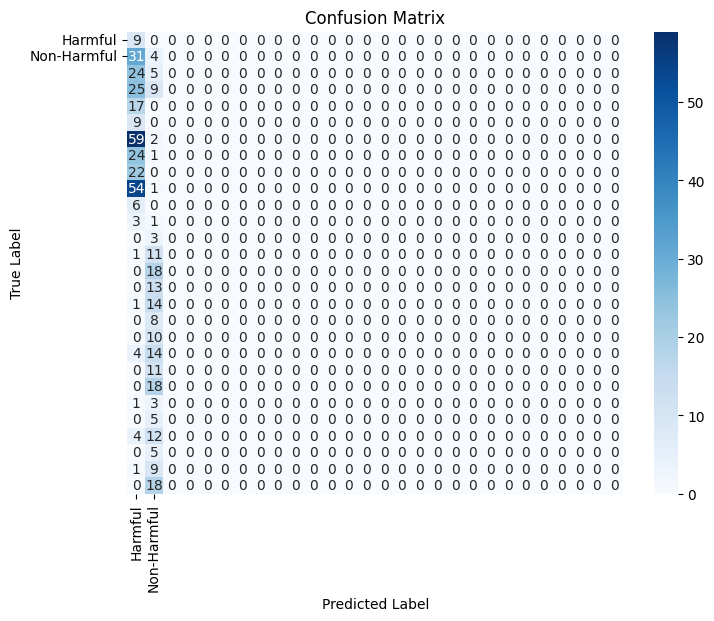

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

  Anabaenopsis       0.03      1.00      0.06         9
Coelosphaerium       0.02      0.11      0.03        35
       Euglena       0.00      0.00      0.00        29
    Fragilaria       0.00      0.00      0.00        34
Gomphosphaeria       0.00      0.00      0.00        17
  Merismopedia       0.00      0.00      0.00         9
   Microcystis       0.00      0.00      0.00        61
  Oscillatoria       0.00      0.00      0.00        25
    Pediastrum       0.00      0.00      0.00        22
    Phormidium       0.00      0.00      0.00        55
  Raphidiopsis       0.00      0.00      0.00         6
   Staurastrum       0.00      0.00      0.00         4
    Achnanthes       0.00      0.00      0.00         3
   Actinastrum       0.00      0.00      0.00        12
Ankistrodesmus       0.00      0.00      0.00        18
    Brachionus       0.00      0.00      0.00        13
      Ceratium       0.00      0.00      0.00  

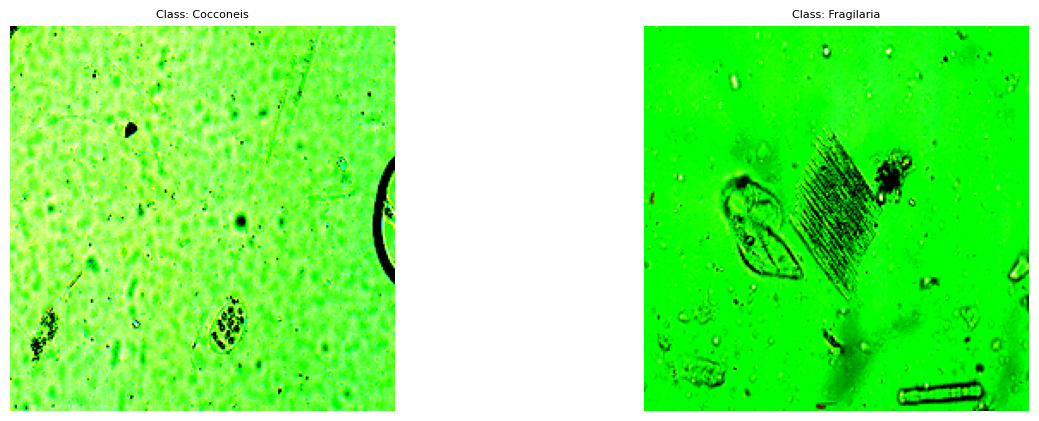

Evaluating model for epoch 15
Loaded pretrained weights for efficientnet-b0


<ipython-input-10-13eb1eb73ad6>:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'/content/drive/MyDrive/Colab/FY_Project/efficientnet_b0_

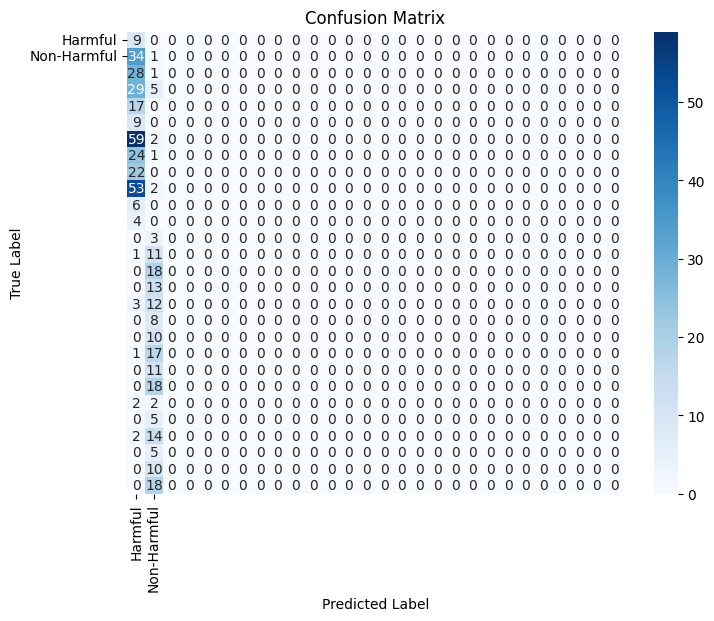

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

  Anabaenopsis       0.03      1.00      0.06         9
Coelosphaerium       0.01      0.03      0.01        35
       Euglena       0.00      0.00      0.00        29
    Fragilaria       0.00      0.00      0.00        34
Gomphosphaeria       0.00      0.00      0.00        17
  Merismopedia       0.00      0.00      0.00         9
   Microcystis       0.00      0.00      0.00        61
  Oscillatoria       0.00      0.00      0.00        25
    Pediastrum       0.00      0.00      0.00        22
    Phormidium       0.00      0.00      0.00        55
  Raphidiopsis       0.00      0.00      0.00         6
   Staurastrum       0.00      0.00      0.00         4
    Achnanthes       0.00      0.00      0.00         3
   Actinastrum       0.00      0.00      0.00        12
Ankistrodesmus       0.00      0.00      0.00        18
    Brachionus       0.00      0.00      0.00        13
      Ceratium       0.00      0.00      0.00  

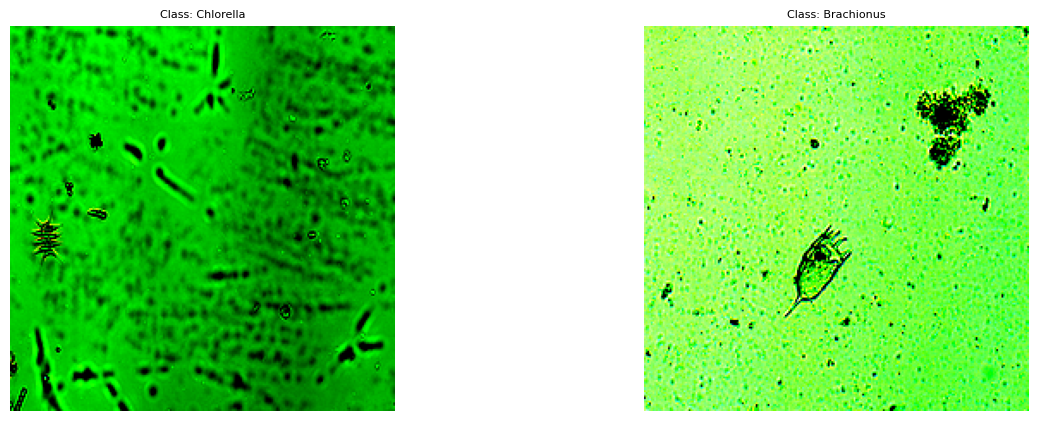

Evaluating model for epoch 25
Loaded pretrained weights for efficientnet-b0


<ipython-input-10-13eb1eb73ad6>:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'/content/drive/MyDrive/Colab/FY_Project/efficientnet_b0_

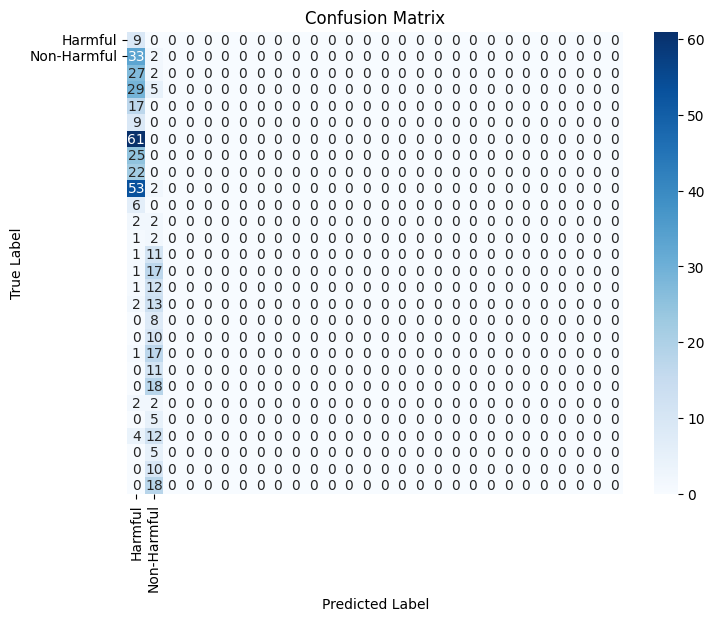

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

  Anabaenopsis       0.03      1.00      0.06         9
Coelosphaerium       0.01      0.06      0.02        35
       Euglena       0.00      0.00      0.00        29
    Fragilaria       0.00      0.00      0.00        34
Gomphosphaeria       0.00      0.00      0.00        17
  Merismopedia       0.00      0.00      0.00         9
   Microcystis       0.00      0.00      0.00        61
  Oscillatoria       0.00      0.00      0.00        25
    Pediastrum       0.00      0.00      0.00        22
    Phormidium       0.00      0.00      0.00        55
  Raphidiopsis       0.00      0.00      0.00         6
   Staurastrum       0.00      0.00      0.00         4
    Achnanthes       0.00      0.00      0.00         3
   Actinastrum       0.00      0.00      0.00        12
Ankistrodesmus       0.00      0.00      0.00        18
    Brachionus       0.00      0.00      0.00        13
      Ceratium       0.00      0.00      0.00  

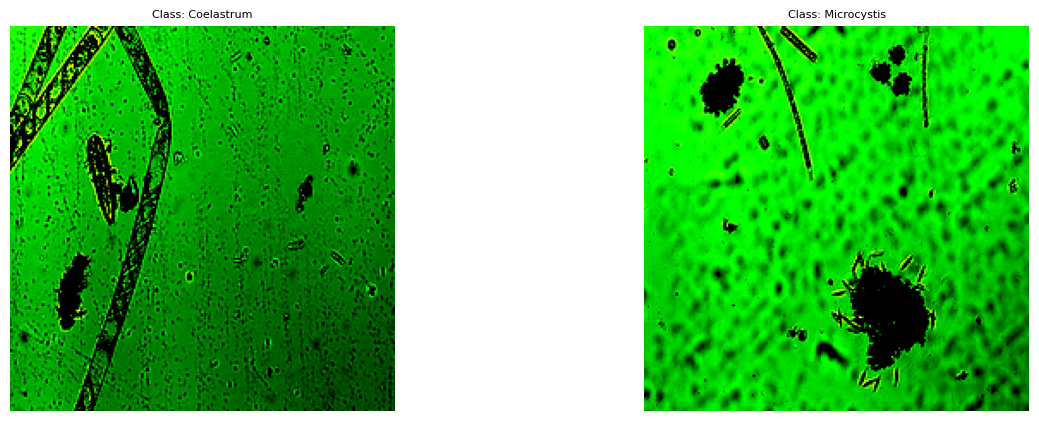

In [ ]:
!pip install efficientnet_pytorch
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, ConcatDataset
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from PIL import Image
from efficientnet_pytorch import EfficientNet

# Check if GPU is available and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

# Function to load a model for a given epoch
def load_model_for_epoch(epoch):
    model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=2)
    # Changed file name pattern here
    model.load_state_dict(torch.load(f'/content/drive/MyDrive/Colab/FY_Project/efficientnet_b0_harmful_non_harmful_best_loss_{epoch}.pth'))
    model.to(device)
    model.eval()
    return model

# Image preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define data directories
data_dir = "/content/drive/MyDrive/Colab/FY_Project/data_split"
harmful_val_dir = os.path.join(data_dir, "harmful", "val")
non_harmful_val_dir = os.path.join(data_dir, "non_harmful", "val")

# Load validation datasets
harmful_val_dataset = datasets.ImageFolder(root=harmful_val_dir, transform=transform)
non_harmful_val_dataset = datasets.ImageFolder(root=non_harmful_val_dir, transform=transform)

# Combine datasets
val_dataset = ConcatDataset([harmful_val_dataset, non_harmful_val_dataset])

# Create data loaders
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Disease mapping (add more as needed)
disease_mapping = {
    'Oscillatoria': 'hepatoenteritis',
    'Microcystis': 'Microcystin Toxicity Syndrome',
    'Pediastrum': 'skin irritation',
    'Staurastrum': 'biofouling-related dermatitis',
    'Phormidium': 'Neurotoxic Cyanobacterial Poisoning',
    'Fragilaria': 'Amnesic Shellfish Poisoning (ASP)',
    'Anabaenopsis': 'muscle twitching',
    'Coelosphaerium': 'liver toxicity and gastrointestinal illness',
    'Merismopedia': 'hypersensitivity pneumonitis',
    'Raphidiopsis': 'liver and kidney damage',
    'Gomphosphaeria': 'hepatotoxicity and gastrointestinal distress',
    'Euglena': 'Euglenophycin Toxicity'
}

# Function to evaluate the model and generate visuals
def evaluate_model(model, val_loader, device):
    all_predictions = []
    all_labels = []
    all_images = []  # Store images for later use

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_images.extend(images.cpu().numpy())  # Store images

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Harmful', 'Non-Harmful'],
                yticklabels=['Harmful', 'Non-Harmful'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Classification Report
    # Get unique labels from the validation dataset
    all_unique_labels = sorted(list(set(all_labels)))  # Assuming all_labels is a list of all labels in your dataset

    # Generate class names based on the unique labels
    class_names = [val_dataset.datasets[0].classes[label] if label < len(val_dataset.datasets[0].classes) else val_dataset.datasets[1].classes[label - len(val_dataset.datasets[0].classes)] for label in all_unique_labels]

    print(classification_report(all_labels, all_predictions, target_names=class_names))  # Use class_names here

    # Display misclassified images with pathogen names and diseases
    misclassified_indices = np.where(np.array(all_predictions) != np.array(all_labels))[0]

    # Filter for harmful pathogens misclassified as non-harmful
    harmful_misclassified_indices = [
        i for i in misclassified_indices
        if all_labels[i] == 0 and all_predictions[i] == 1  # Harmful predicted as Non-Harmful
    ]

    # Select two unique harmful pathogen images
    displayed_pathogens = set()  # Keep track of displayed pathogens
    images_to_display = []
    for index in harmful_misclassified_indices:
        class_name = harmful_val_dataset.classes[all_labels[index]]
        if class_name not in displayed_pathogens:
            images_to_display.append(index)
            displayed_pathogens.add(class_name)
            if len(images_to_display) == 2:  # Display only 2 images
                break

    num_images_to_display = len(images_to_display)  # Update this

    ANNOTATIONS_PATH = "/content/drive/MyDrive/Colab/FY_Project/EMDS7xml"

    if num_images_to_display > 0:
        fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))
        if num_images_to_display == 1:
            axes = [axes]  # Handle case of only 1 image
        for i in range(num_images_to_display):
            index = images_to_display[i]
            image, label = val_dataset[index]

            # Get original image path to get image dimensions
            image_path = val_dataset.datasets[0 if label < len(val_dataset.datasets[0].classes) else 1].samples[index - (len(val_dataset.datasets[0]) if label >= len(val_dataset.datasets[0].classes) else 0)][0]

            # Open the original image using PIL to get dimensions
            with Image.open(image_path) as img:
                img_width, img_height = img.size

            image = image.permute(1, 2, 0)  # Permute to (H, W, C)
            image = image.numpy() # Convert to NumPy array

            predicted_class_name = val_dataset.datasets[0].classes[all_predictions[index]] if all_predictions[index] < len(val_dataset.datasets[0].classes) else val_dataset.datasets[1].classes[all_predictions[index] - len(val_dataset.datasets[0].classes)]
            true_class_name = val_dataset.datasets[0].classes[all_labels[index]] if all_labels[index] < len(val_dataset.datasets[0].classes) else val_dataset.datasets[1].classes[all_labels[index] - len(val_dataset.datasets[0].classes)]
            # Get image file name to find corresponding XML
           # Get image file name to find corresponding XML
            image_file_name = os.path.basename(image_path)
            xml_file_name = image_file_name.replace(".png", ".xml")  # Assuming images are in PNG format
            xml_path = os.path.join(ANNOTATIONS_PATH, xml_file_name)

            # Extract bounding box from XML
            tree = ET.parse(xml_path)
            root = tree.getroot()
            for obj in root.findall('object'):
                bndbox = obj.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                # Adjust bounding box coordinates to match resized image
                xmin = int(xmin * (224 / img_width))  # Assuming resized to 224x224
                ymin = int(ymin * (224 / img_height))
                xmax = int(xmax * (224 / img_width))
                ymax = int(ymax * (224 / img_height))

                # Draw bounding box on the image
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                         linewidth=2, edgecolor='r', facecolor='none')
                axes[i].add_patch(rect)


            axes[i].imshow(image)
            title = f"Predicted: {predicted_class_name}\nDisease: {disease_mapping.get(predicted_class_name, 'Unknown')}\n\n"
            title += f"True: {true_class_name}\nDisease: {disease_mapping.get(true_class_name, 'Unknown')}"

            axes[i].set_title(title, fontsize=8)
            axes[i].axis('off')
        plt.show()
    else:
        print("No harmful pathogens misclassified as non-harmful to display.")

def display_random_images(dataset, num_images=2):
    """Displays a specified number of random images from a dataset."""
    random_indices = np.random.choice(len(dataset), size=num_images, replace=False)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    if num_images == 1:
        axes = [axes]  # Handle case of only 1 image
    for i, index in enumerate(random_indices):
        image, label = dataset[index]
        image = image.permute(1, 2, 0)  # Permute to (H, W, C)
        # Get class name from the correct dataset within ConcatDataset
        class_name = dataset.datasets[0].classes[label] if label < len(dataset.datasets[0].classes) else dataset.datasets[1].classes[label - len(dataset.datasets[0].classes)]  # Corrected the condition and index adjustment
        axes[i].imshow(image)
        axes[i].set_title(f"Class: {class_name}", fontsize=8)
        axes[i].axis('off')
    plt.show()
# Specify the epochs you want to evaluate
epochs_to_evaluate = [10, 15, 25]

for epoch in epochs_to_evaluate:
    print(f"Evaluating model for epoch {epoch}")
    # Load the model for current epoch using defined function
    model = load_model_for_epoch(epoch)
    # ... (Evaluation logic, call evaluate_model(...)...)
    evaluate_model(model, val_loader, device)
    display_random_images(val_dataset)